# Import file and module

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir("..//src//")
import PyGradLimitPDE as pglpde

# Define nodal source value and psi

In [2]:
nodal_source_inner = 0.01
nodal_source_outer = 0.2
nodal_psi = 1.0
linear_psi = 1.0

# Define a circle and a square

In [3]:
inner_boundary = pglpde.createCircleBoundary(20, 0.05, [0.7, 0.5], nodal_source_inner, nodal_psi, linear_psi)
outer_boundary = pglpde.createSquareBoundary(5, 1.0, [0., 0.], nodal_source_outer, nodal_psi, linear_psi)

## Draw the circle

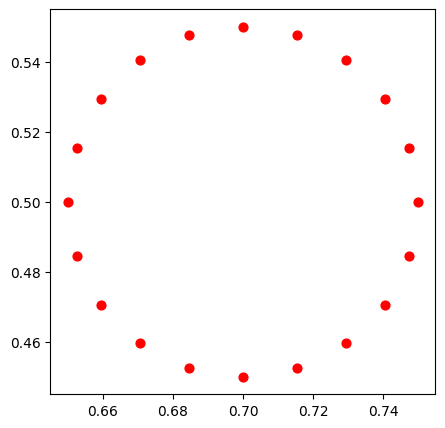

In [4]:
xy = np.array(inner_boundary.xy)
plt.figure(figsize=(8,5), facecolor="white")
plt.gca().set_aspect("equal")
plt.scatter(xy[:,0], xy[:,1], s=40, c="red")
plt.show()

# Draw the square

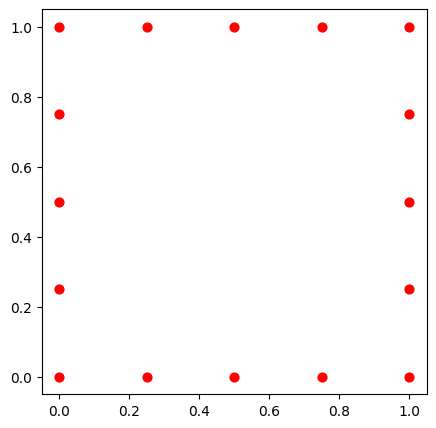

In [5]:
xy = np.array(outer_boundary.xy)
plt.figure(figsize=(8,5), facecolor="white")
plt.gca().set_aspect("equal")
plt.scatter(xy[:,0], xy[:,1], s=40, c="red")
plt.show()

# Background grid

In [6]:
background_grid = pglpde.UniformSquareGrid([0., 0.], 1., 512, 0.2)

# Solve the PDE

In [7]:
gradient_limit_pde = pglpde.GradientLimitPDE(background_grid, [inner_boundary, outer_boundary])

In [8]:
result = pglpde.solve(gradient_limit_pde)

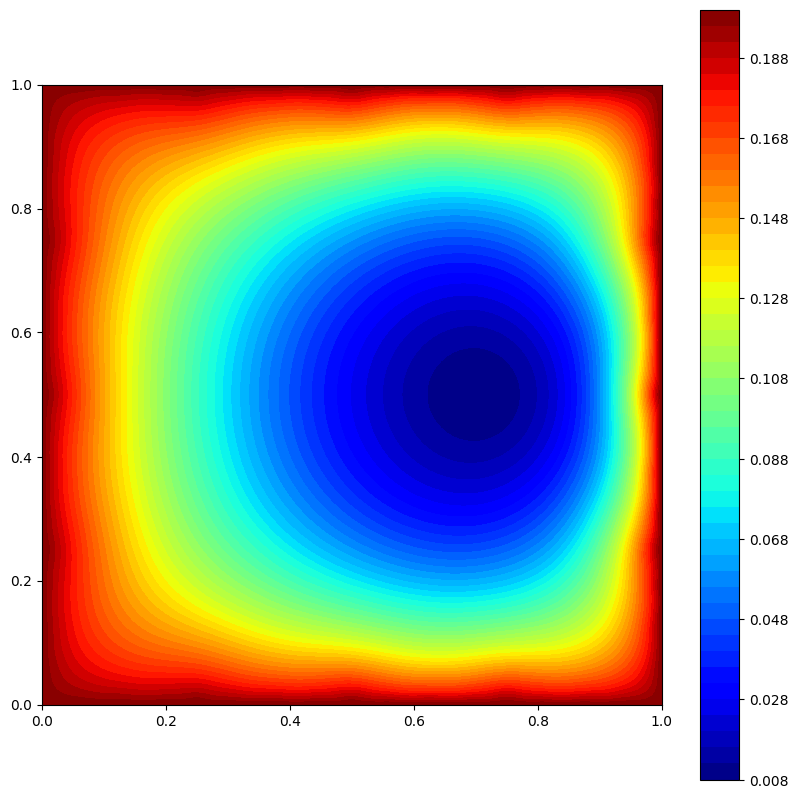

In [9]:
plt.figure(figsize=(10, 10), facecolor="white")
plt.gca().set_aspect("equal")
plt.contourf(background_grid.x_s, background_grid.y_s, result.T, 50, cmap="jet")
plt.colorbar()
plt.show()